# TO PREDICT THE PROBABLITY OF DEFAULT OF CREDIT CARD CLIENTS

# ATTRIBUTES DESCRIPTION:


X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:

X6 = The repayment status in September, 2005.

X7 = The repayment status in August, 2005.

....

X11 = The repayment status in April, 2005.

The measurement scale for the repayment status is:
(-2 = No consumption; -1 = Paid in full; 0 = The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; .... 8 = payment delay for eight months; 9 = payment delay for nine months and above).

X12-X17: Amount of bill statement (NT dollar).

X12 = Amount of bill statement in September, 2005.

X13 = Amount of bill statement in August, 2005.

....

X17 = Amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar).

X18 = Amount paid in September, 2005.

X19 = Amount paid in August, 2005.

....

X23 = Amount paid in April, 2005.

# IMPORTING THE LIBRARIES

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# LOAD THE DATASET AND RESETTING IT TO PROPER TABLE

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_excel('default of credit card clients.xls')

In [4]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
df.columns = df.iloc[0]

In [6]:
df = df.drop(0)

In [7]:
df = df.reset_index(drop = True)

In [8]:
df = df.rename(columns = {'default payment next month' : 'DEFAULT_PAYMENT_NEXT_MONTH', 'PAY_0' : 'PAY_1'})

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df.shape

(30000, 25)

# DATA PREPROCESSING

# DROPPING THE ROWS THAT HAVE MEANINGLESS VALUES

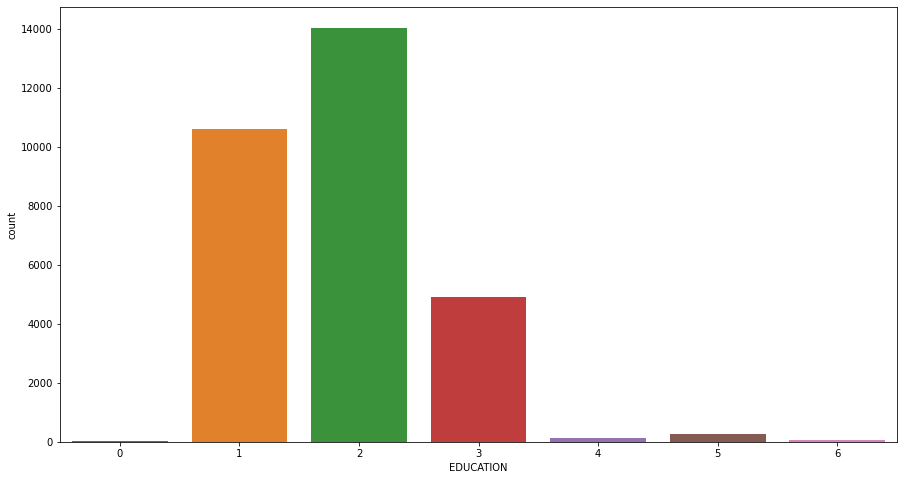

In [11]:
plt.figure(figsize= (15,8))
sns.countplot(df['EDUCATION'])
plt.show()

## In this column 0,5,6 makes no sense and doesn't represent anything

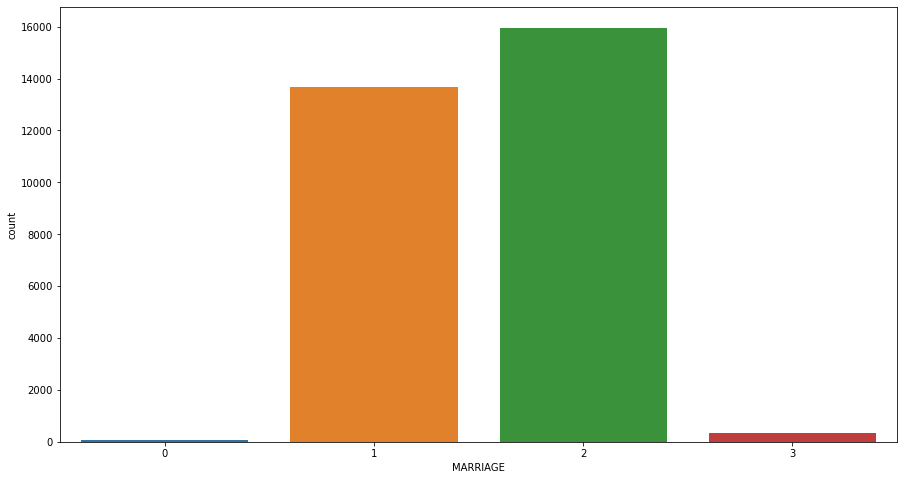

In [12]:
plt.figure(figsize= (15,8))
sns.countplot(df['MARRIAGE'])
plt.show()

## Here 0 makes no sense, hence removed

In [13]:
df = df[(df.MARRIAGE != 0) & (df.EDUCATION != 5) & (df.EDUCATION != 6) & (df.EDUCATION != 0)]

In [14]:
df = df.reset_index(drop = True)

In [15]:
df.shape

(29601, 25)

# CONVERSION OF COLUMNS TO APPROPRIATE DATATYPE

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29601 entries, 0 to 29600
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29601 non-null  object
 1   LIMIT_BAL                   29601 non-null  object
 2   SEX                         29601 non-null  object
 3   EDUCATION                   29601 non-null  object
 4   MARRIAGE                    29601 non-null  object
 5   AGE                         29601 non-null  object
 6   PAY_1                       29601 non-null  object
 7   PAY_2                       29601 non-null  object
 8   PAY_3                       29601 non-null  object
 9   PAY_4                       29601 non-null  object
 10  PAY_5                       29601 non-null  object
 11  PAY_6                       29601 non-null  object
 12  BILL_AMT1                   29601 non-null  object
 13  BILL_AMT2                   29601 non-null  ob

In [17]:
df[['ID','LIMIT_BAL','AGE',
    'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']] = df[['ID','LIMIT_BAL','AGE',
                                                                              'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                                                                              'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29601 entries, 0 to 29600
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29601 non-null  int64 
 1   LIMIT_BAL                   29601 non-null  int64 
 2   SEX                         29601 non-null  object
 3   EDUCATION                   29601 non-null  object
 4   MARRIAGE                    29601 non-null  object
 5   AGE                         29601 non-null  int64 
 6   PAY_1                       29601 non-null  object
 7   PAY_2                       29601 non-null  object
 8   PAY_3                       29601 non-null  object
 9   PAY_4                       29601 non-null  object
 10  PAY_5                       29601 non-null  object
 11  PAY_6                       29601 non-null  object
 12  BILL_AMT1                   29601 non-null  int64 
 13  BILL_AMT2                   29601 non-null  in

# SPLITTING THE DATA INTO NUMERICAL AND CATEGORICAL

In [19]:
num_df = df.select_dtypes(include = np.number)
cat_df = df.select_dtypes(exclude = np.number)

# MISSING VALUE ANALYSIS

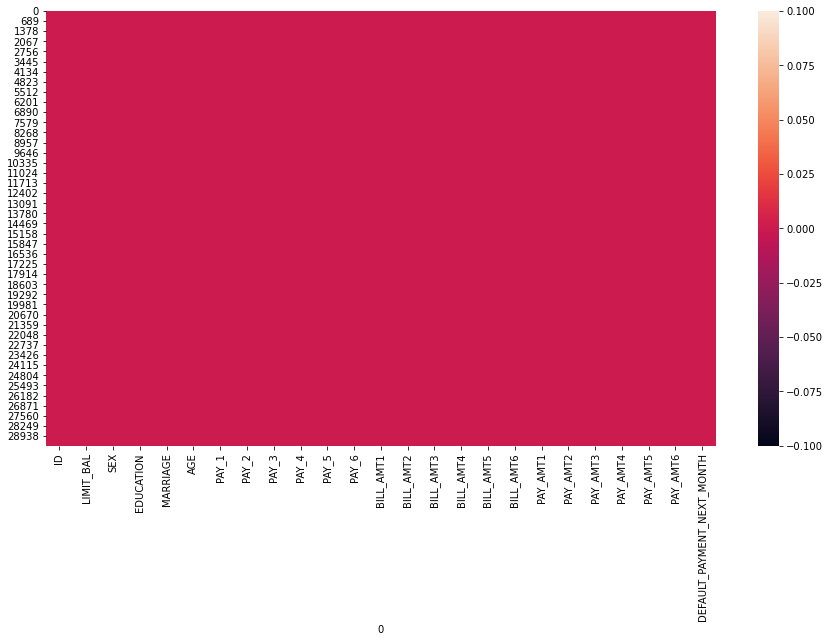

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(df.isnull(), cbar = True)

plt.show()

In [21]:
df.isnull().sum() / len(df)

0
ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_1                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
DEFAULT_PAYMENT_NEXT_MONTH    0.0
dtype: float64

# OUTLIER DETECTION

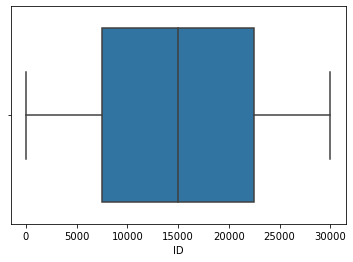

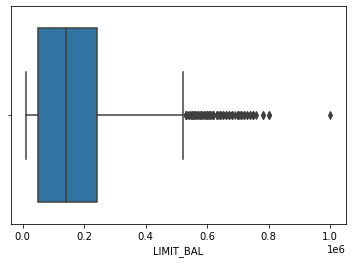

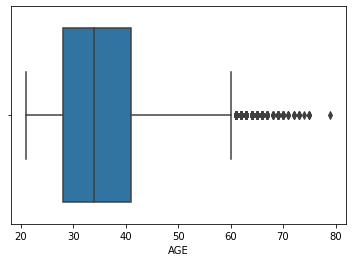

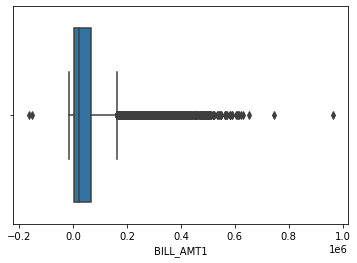

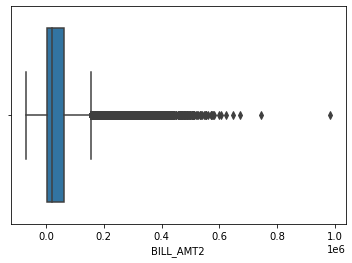

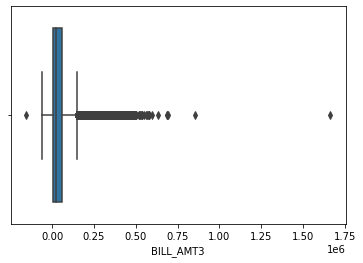

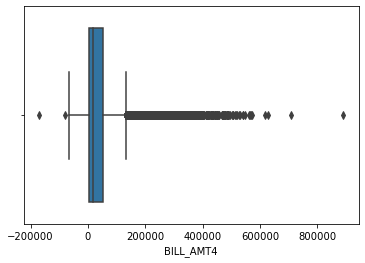

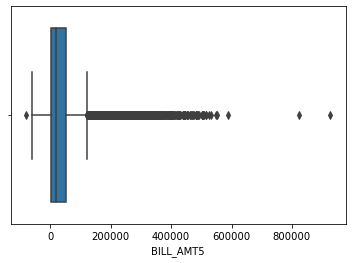

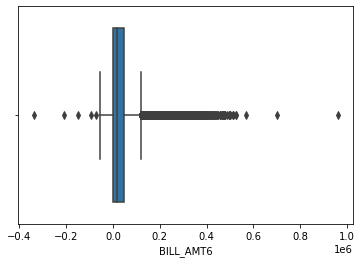

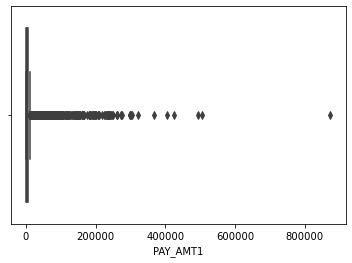

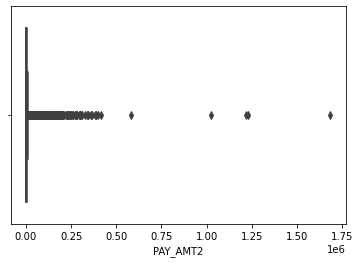

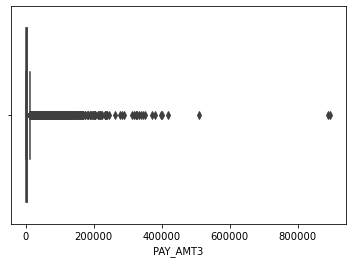

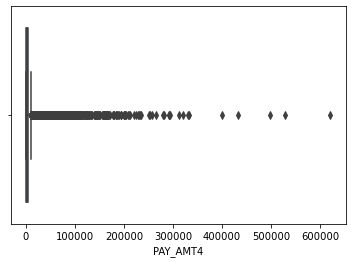

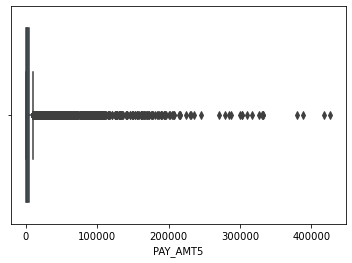

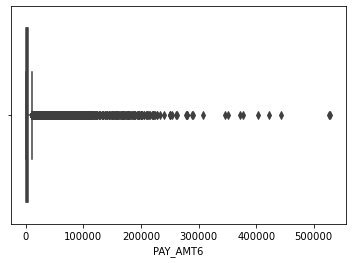

In [22]:
for i in num_df.columns:
    sns.boxplot(num_df[i])
    plt.show()

In [23]:
for i in num_df.columns:
    Q1 = num_df[i].quantile(0.25)
    Q3 = num_df[i].quantile(0.75)
    
    IQR = Q3 - Q1
    
    ub = Q3 + 1.5 * IQR
    lb = Q1 - 1.5 * IQR
    
    print('The number of outliers in ',i, ' is ',len(num_df[((num_df[i] > ub) | (num_df[i] < lb))]))

The number of outliers in  ID  is  0
The number of outliers in  LIMIT_BAL  is  164
The number of outliers in  AGE  is  269
The number of outliers in  BILL_AMT1  is  2370
The number of outliers in  BILL_AMT2  is  2370
The number of outliers in  BILL_AMT3  is  2434
The number of outliers in  BILL_AMT4  is  2593
The number of outliers in  BILL_AMT5  is  2691
The number of outliers in  BILL_AMT6  is  2657
The number of outliers in  PAY_AMT1  is  2703
The number of outliers in  PAY_AMT2  is  2656
The number of outliers in  PAY_AMT3  is  2550
The number of outliers in  PAY_AMT4  is  2956
The number of outliers in  PAY_AMT5  is  2910
The number of outliers in  PAY_AMT6  is  2926


Even though there is large number of outliers, we cannot treat the outliers as they are significant and according to the domain 
it is possible to have outliers in the bill amount and payment amount.

# STATISTICAL TEST

In [24]:
# Checking Statistical significance of independent categorical variables with Target: 

for i in df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]: 
    print("\033[1m" + "Hypothesis Formation:" + "\033[0m")
    print("Null Hypothesis (Ho):",i,"and DEFAULT_PAYMENT_NEXT_MONTH are independent")
    print("Alternate Hypothesis (Ha):",i,"and DEFAULT_PAYMENT_NEXT_MONTH are dependent")
    print()
    
    obs = pd.crosstab(df[i], df['DEFAULT_PAYMENT_NEXT_MONTH']) 
    test_stat, pval, dof, exp = stats.chi2_contingency(obs)
    
    print("\033[1m" + "Statistical Significance of relationship between",i,"and DEFAULT_PAYMENT_NEXT_MONTH:" + "\033[0m") 
    print("Test Statistics: ", test_stat)
    print("pValue: ", pval) 
    print("Degrees of freedom: ", dof) 
    print("\n***************************************************************************************************\n")

Hypothesis Formation:
Null Hypothesis (Ho): SEX and DEFAULT_PAYMENT_NEXT_MONTH are independent
Alternate Hypothesis (Ha): SEX and DEFAULT_PAYMENT_NEXT_MONTH are dependent

Statistical Significance of relationship between SEX and DEFAULT_PAYMENT_NEXT_MONTH:
Test Statistics:  46.729040463318896
pValue:  8.151208643603006e-12
Degrees of freedom:  1

***************************************************************************************************

Hypothesis Formation:
Null Hypothesis (Ho): EDUCATION and DEFAULT_PAYMENT_NEXT_MONTH are independent
Alternate Hypothesis (Ha): EDUCATION and DEFAULT_PAYMENT_NEXT_MONTH are dependent

Statistical Significance of relationship between EDUCATION and DEFAULT_PAYMENT_NEXT_MONTH:
Test Statistics:  118.72224730588866
pValue:  1.4541546992112855e-25
Degrees of freedom:  3

***************************************************************************************************

Hypothesis Formation:
Null Hypothesis (Ho): MARRIAGE and DEFAULT_PAYMENT_NEXT_MON

Inference: 
    
    ==>  From the results of statistical significance analysis of independent categorical variables with target using Chi-Square Test for Independence, we could see the pValue from all the statistical analysis is less than the significance level of 5% (0.05). 
    
    ==>  Hence Null hypothesis (Ho) is rejected and Alternate Hypothesis (Ha) can be selected. Thus, it is evident that all the independent categorical variables have significant relationship with the target variable.

# CONDITION CHECK FOR ANOVA TEST

### NORMALITY CHECK

In [25]:
a0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['LIMIT_BAL']
a1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['LIMIT_BAL']

b0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['AGE']
b1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['AGE']

In [26]:
c0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['BILL_AMT1']
c1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['BILL_AMT1']

d0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['BILL_AMT2']
d1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['BILL_AMT2']

e0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['BILL_AMT3']
e1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['BILL_AMT3']

f0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['BILL_AMT4']
f1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['BILL_AMT4']

g0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['BILL_AMT5']
g1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['BILL_AMT5']

h0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['BILL_AMT6']
h1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['BILL_AMT6']

In [27]:
i0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['PAY_AMT1']
i1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['PAY_AMT1']

j0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['PAY_AMT2']
j1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['PAY_AMT2']

k0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['PAY_AMT3']
k1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['PAY_AMT3']

l0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['PAY_AMT4']
l1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['PAY_AMT4']

m0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['PAY_AMT5']
m1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['PAY_AMT5']

n0 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['PAY_AMT6']
n1 = df[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['PAY_AMT6']

In [28]:
# Test of Normality 

# Ho: skew = 0
# Ha: skew != 0

print("Shapiro result for a0:",stats.shapiro(a0))
print("Shapiro result for a1:",stats.shapiro(a1))
print("Shapiro result for b0:",stats.shapiro(b0))
print("Shapiro result for b1:",stats.shapiro(b1))
print("Shapiro result for c0:",stats.shapiro(c0)) 
print("Shapiro result for c1",stats.shapiro(c1)) 
print("Shapiro result for d0:",stats.shapiro(d0)) 
print("Shapiro result for d1:",stats.shapiro(d1)) 
print("Shapiro result for e0:",stats.shapiro(e0))
print("Shapiro result for e1:",stats.shapiro(e1))
print("Shapiro result for f0:",stats.shapiro(f0))
print("Shapiro result for f1:",stats.shapiro(f1))
print("Shapiro result for g0:",stats.shapiro(g0)) 
print("Shapiro result for g1",stats.shapiro(g1)) 
print("Shapiro result for h0:",stats.shapiro(h0)) 
print("Shapiro result for h1:",stats.shapiro(h1)) 
print("Shapiro result for i0:",stats.shapiro(i0))
print("Shapiro result for i1:",stats.shapiro(i1))
print("Shapiro result for j0:",stats.shapiro(j0))
print("Shapiro result for j1:",stats.shapiro(j1))
print("Shapiro result for k0:",stats.shapiro(k0)) 
print("Shapiro result for k1",stats.shapiro(k1)) 
print("Shapiro result for l0:",stats.shapiro(l0)) 
print("Shapiro result for l1:",stats.shapiro(l1)) 
print("Shapiro result for m0:",stats.shapiro(m0))
print("Shapiro result for m1:",stats.shapiro(m1))
print("Shapiro result for n0:",stats.shapiro(n0))
print("Shapiro result for n1:",stats.shapiro(n1))

Shapiro result for a0: ShapiroResult(statistic=0.9195519685745239, pvalue=0.0)
Shapiro result for a1: ShapiroResult(statistic=0.8549643754959106, pvalue=0.0)
Shapiro result for b0: ShapiroResult(statistic=0.9491810202598572, pvalue=0.0)
Shapiro result for b1: ShapiroResult(statistic=0.9497825503349304, pvalue=9.696985373127734e-43)
Shapiro result for c0: ShapiroResult(statistic=0.7068356871604919, pvalue=0.0)
Shapiro result for c1 ShapiroResult(statistic=0.6586236357688904, pvalue=0.0)
Shapiro result for d0: ShapiroResult(statistic=0.7037893533706665, pvalue=0.0)
Shapiro result for d1: ShapiroResult(statistic=0.6603682041168213, pvalue=0.0)
Shapiro result for e0: ShapiroResult(statistic=0.6857008934020996, pvalue=0.0)
Shapiro result for e1: ShapiroResult(statistic=0.6622762680053711, pvalue=0.0)
Shapiro result for f0: ShapiroResult(statistic=0.6872107982635498, pvalue=0.0)
Shapiro result for f1: ShapiroResult(statistic=0.6580805778503418, pvalue=0.0)
Shapiro result for g0: ShapiroResul

Inference:

    ==> pValue of Shapiro Result for scores of different adverse effects < 0.05 (sig. lvl).
    
    ==> Hence, Ho is rejected and so data is not normal .

### VARIANCE CHECK

In [29]:
# Test for equality of variance 

# Ho: All variances are equal
# Ha: Atleast one variance is different 

print(stats.levene(a0,a1,b0,b1,c0,c1,d0,d1,e0,e1,f0,f1,g0,g1,h0,h1,i0,i1,j0,j1,k0,k1,l0,l1,m0,m1,n0,n1)) 

LeveneResult(statistic=5260.471598686392, pvalue=0.0)


Inference:

    ==> pValue of Levene Result for scores of different adverse effects < 0.05 (sig. lvl).
    
    ==> Hence, Ho is rejected and all variances are not equal. 

#### Since it doesn't satisfy both the conditions, we can't use ANOVA test here. Hence Non-Parametric test is used.

# NON-PARAMETRIC TEST (KRUSKAL TEST)

In [30]:
# Hypothesis for Kruskal: 

# Ho: All medians are equal
# Ha: Atleast one median is different

In [31]:
stats.kruskal(a0,a1,b0,b1,c0,c1,d0,d1,e0,e1,f0,f1,g0,g1,h0,h1,i0,i1,j0,j1,k0,k1,l0,l1,m0,m1,n0,n1)

KruskalResult(statistic=157311.5087661885, pvalue=0.0)

Inference:

    ==> pValue of Kruskal Result for scores of different adverse effects < 0.05 (sig. lvl) 
   
    ==> Hence, Ho is rejected and all medians are not equal. 

# BILL AMOUNT vs DEFAULT CREDIT CARD CUSTOMERS

In [32]:
df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT1'].sum() / df['BILL_AMT1'].sum() * 100

DEFAULT_PAYMENT_NEXT_MONTH
0    78.8437
1    21.1563
Name: BILL_AMT1, dtype: float64

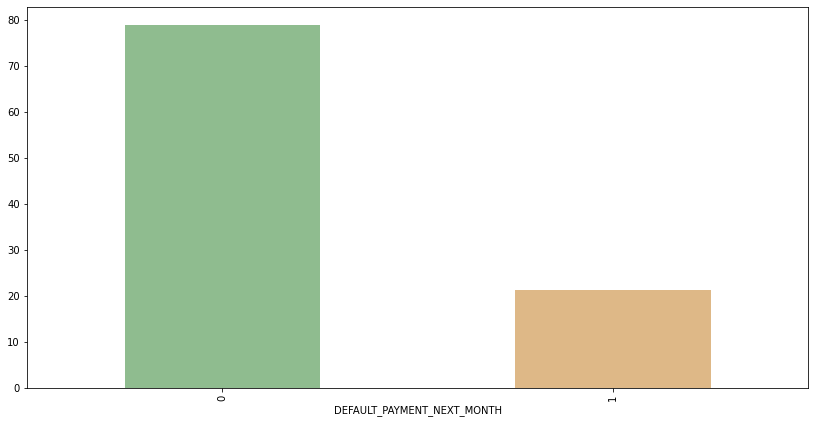

In [33]:
plt.figure(figsize = (14,7))
(df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT1'].sum() / df['BILL_AMT1'].sum() * 100).plot(kind = 'bar', color = ['darkseagreen','burlywood'])
plt.show()

In [34]:
df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT2'].sum() / df['BILL_AMT2'].sum() * 100

DEFAULT_PAYMENT_NEXT_MONTH
0    78.513736
1    21.486264
Name: BILL_AMT2, dtype: float64

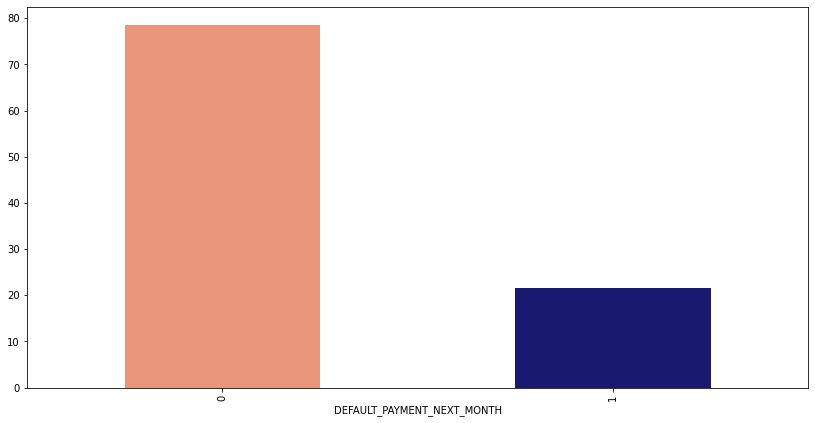

In [35]:
plt.figure(figsize = (14,7))
(df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT2'].sum() / df['BILL_AMT2'].sum() * 100).plot(kind = 'bar', color = ['darksalmon','midnightblue'])
plt.show()

In [36]:
df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT3'].sum() / df['BILL_AMT3'].sum() * 100

DEFAULT_PAYMENT_NEXT_MONTH
0    78.516333
1    21.483667
Name: BILL_AMT3, dtype: float64

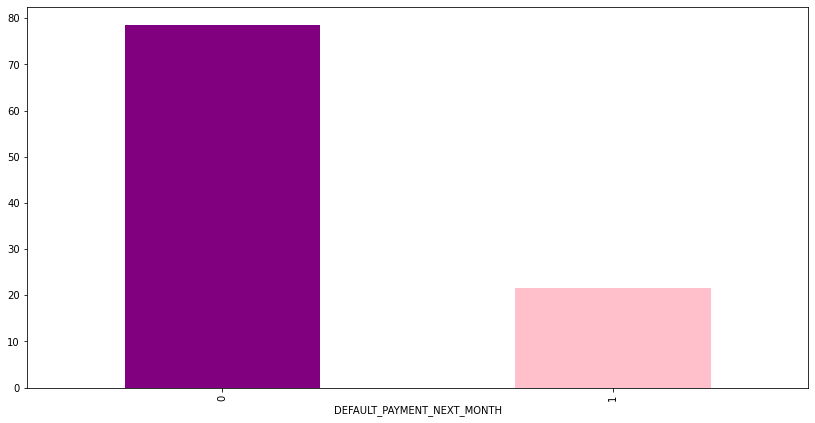

In [37]:
plt.figure(figsize = (14,7))
(df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT3'].sum() / df['BILL_AMT3'].sum() * 100).plot(kind = 'bar', color = ['purple','pink'])
plt.show()

In [38]:
df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT4'].sum() / df['BILL_AMT4'].sum() * 100

DEFAULT_PAYMENT_NEXT_MONTH
0    78.273797
1    21.726203
Name: BILL_AMT4, dtype: float64

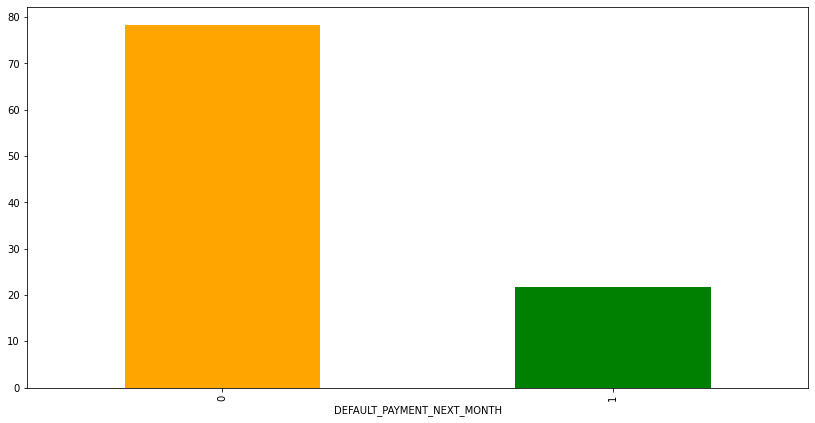

In [39]:
plt.figure(figsize = (14,7))
(df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT4'].sum() / df['BILL_AMT4'].sum() * 100).plot(kind = 'bar', color = ['orange','green'])
plt.show()

In [40]:
df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT5'].sum() / df['BILL_AMT5'].sum() * 100

DEFAULT_PAYMENT_NEXT_MONTH
0    78.077637
1    21.922363
Name: BILL_AMT5, dtype: float64

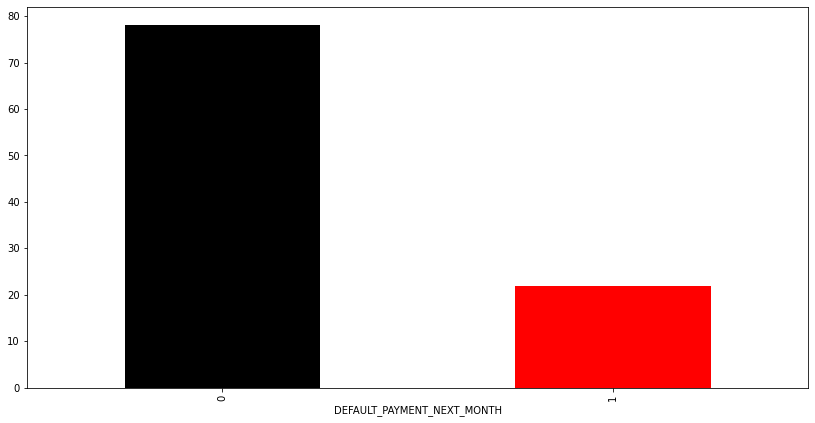

In [41]:
plt.figure(figsize = (14,7))
(df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT5'].sum() / df['BILL_AMT5'].sum() * 100).plot(kind = 'bar', color = ['black','red'])
plt.show()

In [42]:
df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT6'].sum() / df['BILL_AMT6'].sum() * 100

DEFAULT_PAYMENT_NEXT_MONTH
0    78.027014
1    21.972986
Name: BILL_AMT6, dtype: float64

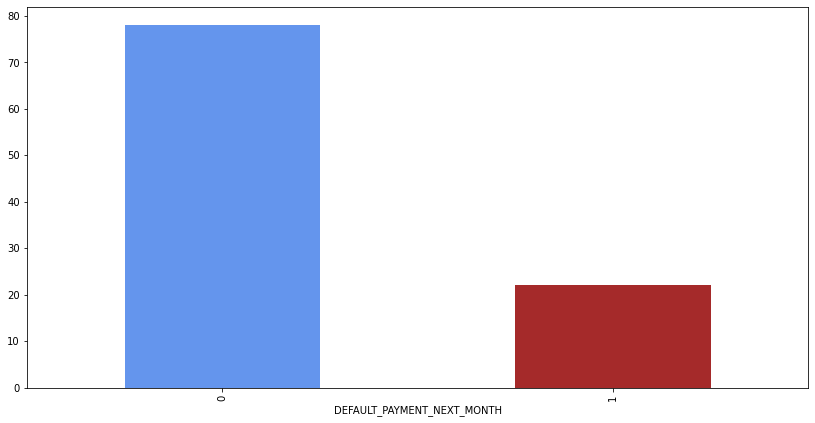

In [43]:
plt.figure(figsize = (14,7))
(df.groupby('DEFAULT_PAYMENT_NEXT_MONTH')['BILL_AMT6'].sum() / df['BILL_AMT6'].sum() * 100).plot(kind = 'bar', color = ['cornflowerblue','brown'])
plt.show()

# DATA INTERPRETATION USING GRAPHS

## BIVARIATE ANALYSIS

### CREDIT LIMIT WITH SEX

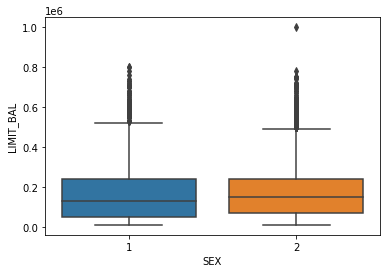

In [44]:
sns.boxplot(data = df, x = 'SEX', y = 'LIMIT_BAL')
plt.show()

## Credit Limit by Sex. The data is evenly distributed amongst males and females.

### AGE WITH MARRIAGE

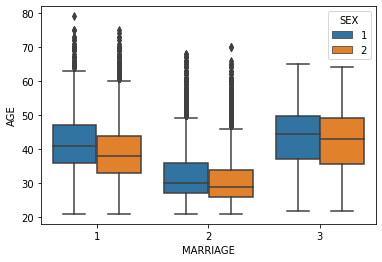

In [45]:
sns.boxplot(data = df, x = 'MARRIAGE', y = 'AGE', hue = 'SEX')
plt.show()

## The dataset mostly contains couples in their mid-30s to mid-40s and single people in their mid-20s to early-30s.

### MAXIMUM LIMIT OF CREDIT CARD LIMIT AMOUNT

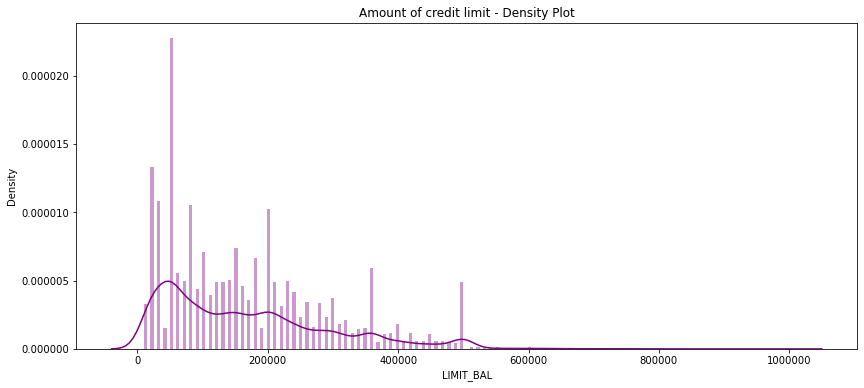

In [46]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')

sns.set_color_codes("pastel")

sns.distplot(df['LIMIT_BAL'], kde = True, bins = 200, color = "purple")
plt.ticklabel_format(useOffset = False, style = 'plain')

plt.show()

In [47]:
df[df['LIMIT_BAL'] > 50000].shape

(22016, 25)

In [48]:
df['LIMIT_BAL'].value_counts().head()

50000     3331
20000     1955
30000     1586
80000     1542
200000    1498
Name: LIMIT_BAL, dtype: int64

The largest number of credit cards are with limit of 50,000

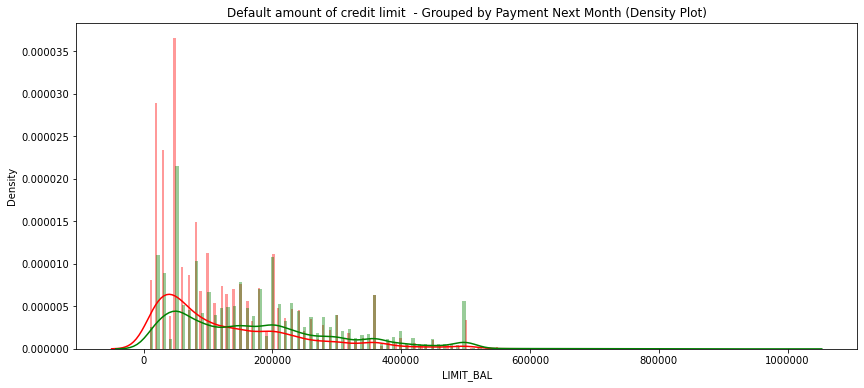

In [49]:
class_0 = df.loc[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]["LIMIT_BAL"]

plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - Grouped by Payment Next Month (Density Plot)')

sns.set_color_codes("pastel")

sns.distplot(class_1, kde = True, bins = 200, color = "red")
sns.distplot(class_0, kde = True, bins = 200, color = "green")
plt.ticklabel_format(useOffset = False, style = 'plain')

plt.show()

# CLASS IMBALANCE AND ITS TREATMENT

In [50]:
df['DEFAULT_PAYMENT_NEXT_MONTH'].value_counts()

0    22996
1     6605
Name: DEFAULT_PAYMENT_NEXT_MONTH, dtype: int64

In [51]:
df['DEFAULT_PAYMENT_NEXT_MONTH'].value_counts(normalize = True)

0    0.776866
1    0.223134
Name: DEFAULT_PAYMENT_NEXT_MONTH, dtype: float64

There is imbalance in the target variable and but since its not that huge , there is no need to treat the same

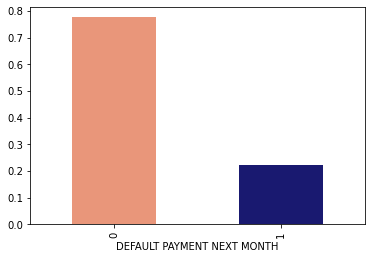

In [52]:
df['DEFAULT_PAYMENT_NEXT_MONTH'].value_counts(normalize = True).plot(kind = 'bar', color = ['darksalmon','midnightblue'])
plt.xlabel('DEFAULT PAYMENT NEXT MONTH')
plt.show()

# FEATURES CORRELATION

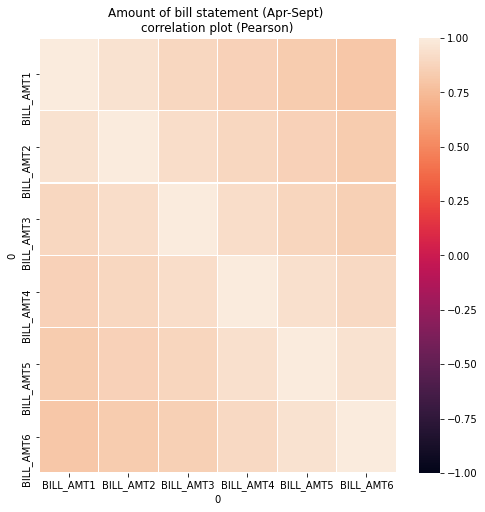

In [53]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')

corr = df[var].corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = .1, vmin = -1, vmax = 1)
plt.show()

Correlation is decreasing with distance between months.

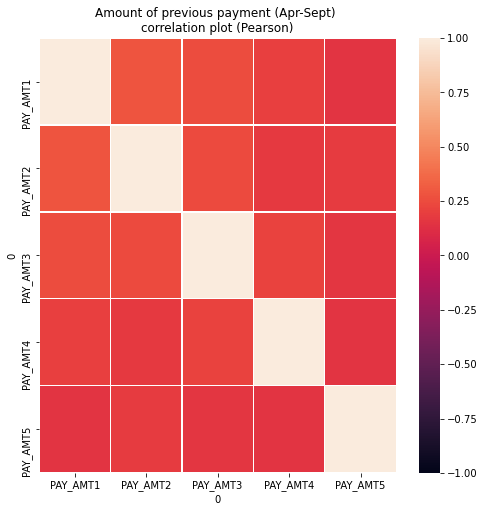

In [54]:
var1 = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')

corr = df[var1].corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = .1, vmin = -1, vmax = 1)
plt.show()

There are no correlations between amounts of previous payments for April-Sept 2005.

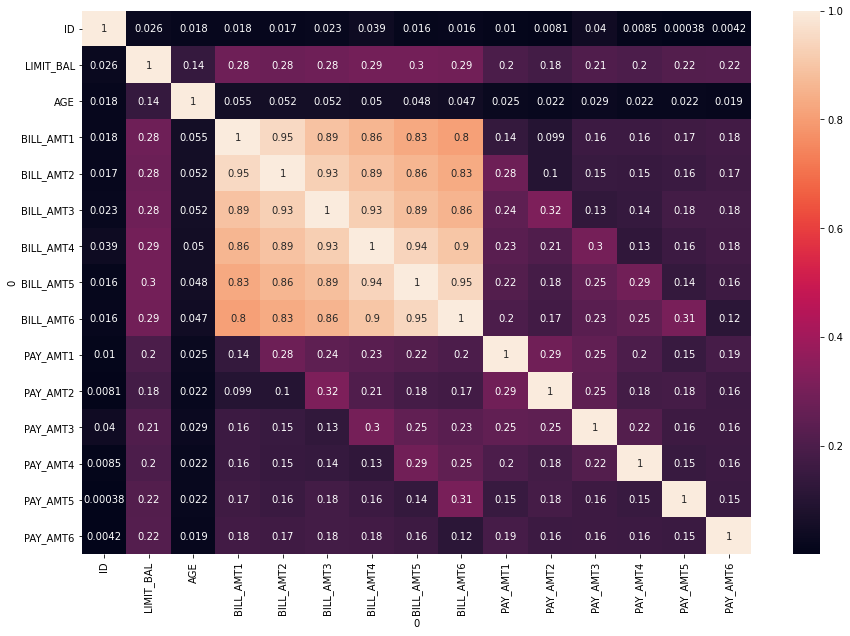

In [55]:
plt.figure(figsize = (15,10))
sns.heatmap(num_df.corr(),annot = True)
plt.show()

# PREDICTIVE MODELS

In [56]:
df['DEFAULT_PAYMENT_NEXT_MONTH'] = df['DEFAULT_PAYMENT_NEXT_MONTH'].astype('int')

In [104]:
target = df['DEFAULT_PAYMENT_NEXT_MONTH']

predictors = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
              'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
              'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
              'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
              'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# TRAIN TEST SPLIT

In [105]:
x_train, x_test, y_train, y_test = train_test_split(predictors,target, test_size = 0.3, random_state = 3, shuffle = True )

# RANDOM FOREST CLASSIFIER

In [106]:
clf = RandomForestClassifier(n_jobs = 4, 
                             random_state = 3,
                             criterion = 'gini',
                             n_estimators = 100,
                             verbose = False)

In [107]:
## Copying data for later usage

x_train_df = x_train.copy()
x_test_df = x_test.copy()
y_train_df = y_train.copy()
y_test_df = y_test.copy()

In [108]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=3, verbose=False)

In [109]:
preds = clf.predict(x_test)

In [110]:
clf.feature_importances_

array([0.06072502, 0.01274792, 0.01975392, 0.01399839, 0.06731161,
       0.09181065, 0.04715413, 0.02665618, 0.02361805, 0.0182877 ,
       0.01965416, 0.0610192 , 0.05457737, 0.0516724 , 0.05105676,
       0.05003566, 0.0503399 , 0.05093525, 0.04876158, 0.0450999 ,
       0.04328306, 0.04444992, 0.04705125])

# FEATURE SELECTION

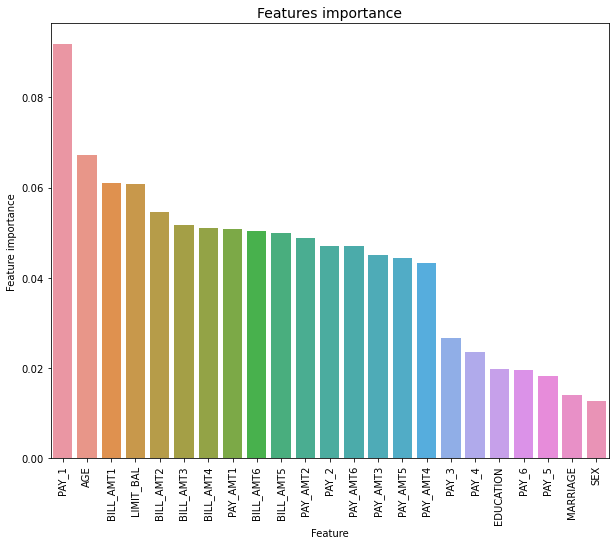

In [111]:
tmp = pd.DataFrame({'Feature' : features, 'Feature importance' : clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature importance', ascending = False)

plt.figure(figsize = (10,8))
plt.title('Features importance',fontsize = 14)

s = sns.barplot(x = 'Feature', y = 'Feature importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)

plt.show() 

The most important features are PAY_1, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2 and BILL_AMT3.

# CLASSIFICATION REPORT

In [112]:
clf_cv_score = cross_val_score(clf, predictors, target, cv = 10, scoring = 'roc_auc')

In [113]:
print('========================= Confusion Matrix =========================')
print('\n')
print(confusion_matrix(y_test, preds))
print('\n')

print('========================= Classification Report =========================')
print('\n')
print(classification_report(y_test, preds))
print('\n')

print('========================= All AUC Scores =========================')
print('\n')
print(clf_cv_score)
print('\n')

print('========================= Mean AUC Score =========================')
print('\n')
print('Mean AUC Score - Random Forest:',clf_cv_score.mean())

========================= Confusion Matrix =========================


[[6482  392]
 [1265  742]]


========================= Classification Report =========================


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6874
           1       0.65      0.37      0.47      2007

    accuracy                           0.81      8881
   macro avg       0.75      0.66      0.68      8881
weighted avg       0.80      0.81      0.79      8881



========================= All AUC Scores =========================


[0.74045846 0.74086576 0.75046212 0.73368445 0.76223465 0.78360639
 0.79499045 0.76866535 0.78300132 0.785778  ]


========================= Mean AUC Score =========================


Mean AUC Score - Random Forest: 0.7643746935277562


# CONFUSION MATRIX

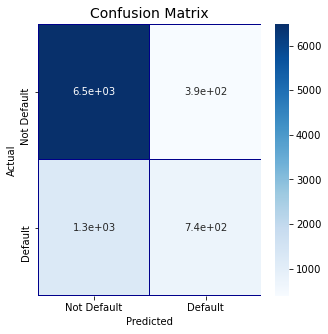

In [116]:
cm = pd.crosstab(y_test, preds, rownames = ['Actual'], colnames = ['Predicted'])

fig, (ax1) = plt.subplots(ncols = 1, figsize = (5,5))

sns.heatmap(cm, 
            xticklabels = ['Not Default', 'Default'],
            yticklabels = ['Not Default', 'Default'],
            annot = True, ax = ax1,
            linewidths = .2, linecolor = "Darkblue", cmap = "Blues")

plt.title('Confusion Matrix', fontsize = 14)
plt.show()

### roc_auc_score

In [118]:
## Calculating the area under curve(receiver operator characteristic)

roc_auc_score(y_test, preds)

0.6563397761602213

# RANDOM FOREST WITH ONE HOT ENCODER

In [137]:
df['DEFAULT_PAYMENT_NEXT_MONTH'] = df['DEFAULT_PAYMENT_NEXT_MONTH'].astype('int')

In [138]:
cat_df1 = df.select_dtypes(exclude = np.number)

In [139]:
x_train_f_df = pd.get_dummies(x_train_df, columns = cat_df1.columns, drop_first = True)
x_test_f_df = pd.get_dummies(x_test_df, columns = cat_df1.columns, drop_first = True)
y_train_f_df = pd.get_dummies(y_train_df, columns = cat_df1.columns, drop_first = True)
y_test_f_df = pd.get_dummies(y_test_df, columns = cat_df1.columns, drop_first = True)

In [140]:
print("Default of Credit Card Clients xtrain data -  rows:",x_train_f_df.shape[0]," columns:", x_train_f_df.shape[1])
print("Default of Credit Card Clients xtest data -  rows:",x_test_f_df.shape[0]," columns:", x_test_f_df.shape[1])

print("Default of Credit Card Clients ytrain data -  rows:",y_train_f_df.shape[0]," columns:", y_train_f_df.shape[1])
print("Default of Credit Card Clients ytest data -  rows:",y_test_f_df.shape[0]," columns:", y_test_f_df.shape[1])

Default of Credit Card Clients xtrain data -  rows: 20720  columns: 77
Default of Credit Card Clients xtest data -  rows: 8881  columns: 74
Default of Credit Card Clients ytrain data -  rows: 20720  columns: 1
Default of Credit Card Clients ytest data -  rows: 8881  columns: 1


Columns are not equal. So we need to align them.

In [141]:
x_train_fa_df, x_test_fa_df = x_train_f_df.align(x_test_f_df, join = 'outer', axis = 1, fill_value = 0)
y_train_fa_df, y_test_fa_df = y_train_f_df.align(y_test_f_df, join = 'outer', axis = 1, fill_value = 0)

In [142]:
print("Default of Credit Card Clients xtrain data -  rows:",x_train_fa_df.shape[0]," columns:", x_train_fa_df.shape[1])
print("Default of Credit Card Clients xtest data -  rows:",x_test_fa_df.shape[0]," columns:", x_test_fa_df.shape[1])

print("Default of Credit Card Clients ytrain data -  rows:",y_train_fa_df.shape[0]," columns:", y_train_fa_df.shape[1])
print("Default of Credit Card Clients ytest data -  rows:",y_test_fa_df.shape[0]," columns:", y_test_fa_df.shape[1])

Default of Credit Card Clients xtrain data -  rows: 20720  columns: 78
Default of Credit Card Clients xtest data -  rows: 8881  columns: 78
Default of Credit Card Clients ytrain data -  rows: 20720  columns: 1
Default of Credit Card Clients ytest data -  rows: 8881  columns: 1


In [143]:
x_train_fa_df.head(3)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,LIMIT_BAL,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2
14190,33,79099,80828,82583,84687,84832,84576,0,0,0,380000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3000,3100,3500,3500,3200,3000,0
15001,22,205736,199379,132963,145115,153040,155636,1,0,0,200000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7758,5001,15000,10800,5600,0,1
27610,28,79573,81449,83241,84960,86045,88060,1,0,0,110000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3800,4000,4000,3400,3400,7000,1


In [150]:
x_test_fa_df.head(3)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,LIMIT_BAL,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2
9421,23,49235,45173,39585,36189,21772,21417,1,0,0,140000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2517,1559,2000,1003,1000,1002,1
14836,42,40466,41805,42520,43378,46664,47341,0,0,0,70000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1994,1709,1567,4000,1600,2000,1
7129,39,61708,65080,68835,41462,36589,39985,0,0,0,80000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5000,5169,21,3000,4000,57,0


In [134]:
y_train_fa_df.head(3)

,1
14190,0
15001,1
27610,0


In [135]:
y_test_fa_df.head(3)

,1
9421,0
14836,1
7129,0


In [183]:
target_f = df['DEFAULT_PAYMENT_NEXT_MONTH']

predictors_f = df.drop(['DEFAULT_PAYMENT_NEXT_MONTH','ID'], axis = 1)

features2 = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 
            'LIMIT_BAL',
            'MARRIAGE_2', 'MARRIAGE_3', 
            'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 
            'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 
            'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 
            'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 
            'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 
            'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SEX_2']

In [184]:
clf.fit(x_train_fa_df, y_train_fa_df)

RandomForestClassifier(n_jobs=4, random_state=3, verbose=False)

In [185]:
preds = clf.predict(x_test_fa_df)

In [187]:
clf.feature_importances_

array([6.61183419e-02, 5.86200566e-02, 5.31511558e-02, 5.38284568e-02,
       5.02963877e-02, 4.99374142e-02, 4.94708591e-02, 1.18339238e-02,
       9.04372910e-03, 4.72745429e-04, 6.28233571e-02, 1.25002669e-02,
       1.95747459e-03, 5.55035724e-03, 1.37194168e-02, 8.45384322e-03,
       5.71406535e-02, 4.65745599e-03, 6.37370991e-04, 1.60562481e-04,
       7.02932055e-05, 3.08318405e-05, 2.96082061e-05, 4.97540531e-03,
       5.82596727e-03, 1.62715250e-04, 3.00723943e-02, 3.27818176e-03,
       4.09690873e-04, 1.45054707e-04, 1.10126430e-04, 5.49484416e-05,
       0.00000000e+00, 4.37564759e-03, 4.36878833e-03, 1.72390966e-05,
       1.75913615e-02, 1.15222147e-03, 4.08314694e-04, 1.03341572e-04,
       1.04777291e-04, 1.01502675e-04, 3.45711193e-06, 4.23853364e-03,
       4.88588213e-03, 4.48393276e-07, 1.21937106e-02, 8.81946856e-04,
       3.52011316e-04, 2.03321389e-04, 2.67245563e-05, 2.95372717e-04,
       7.52064770e-07, 4.12144109e-03, 5.09216007e-03, 1.10596432e-02,
      

# FEATURE SELECTION

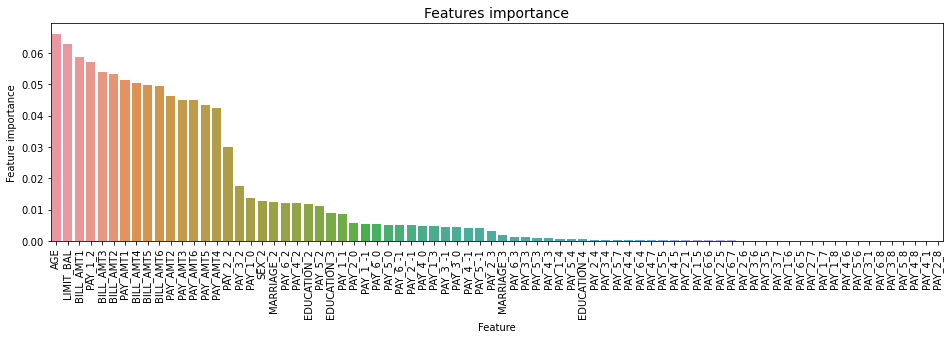

In [188]:
tmp = pd.DataFrame({'Feature': features2, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature importance', ascending = False)

plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize = 14)

s = sns.barplot(x = 'Feature', y = 'Feature importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)

plt.show()

The most important features are AGE, LIMIT_BAL, BILL_AMT1, PAY_1_2, BILL_AMT3  and BILL_AMT2.

# CLASSIFICATION REPORT

In [189]:
clf_cv_score = cross_val_score(clf, predictors_f, target_f, cv = 10, scoring = 'roc_auc')

In [190]:
print('========================= Confusion Matrix =========================')
print('\n')
print(confusion_matrix(y_test_fa_df, preds))
print('\n')

print('========================= Classification Report =========================')
print('\n')
print(classification_report(y_test_fa_df, preds))
print('\n')

print('========================= All AUC Scores =========================')
print('\n')
print(clf_cv_score)
print('\n')

print('========================= Mean AUC Score =========================')
print('\n')
print('Mean AUC Score - Random Forest:',clf_cv_score.mean())

========================= Confusion Matrix =========================


[[6485  389]
 [1250  757]]


========================= Classification Report =========================


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6874
           1       0.66      0.38      0.48      2007

    accuracy                           0.82      8881
   macro avg       0.75      0.66      0.68      8881
weighted avg       0.80      0.82      0.80      8881



========================= All AUC Scores =========================


[0.74045846 0.74086576 0.75046212 0.73368445 0.76223465 0.78360639
 0.79499045 0.76866535 0.78300132 0.785778  ]


========================= Mean AUC Score =========================


Mean AUC Score - Random Forest: 0.7643746935277562


# CONFUSION MATRIX

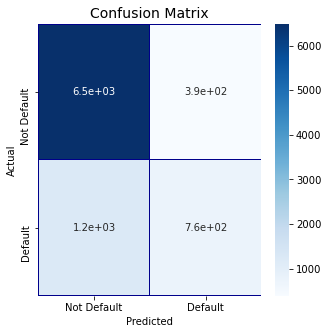

In [78]:
cm = pd.crosstab(test_fa_df[target].values, preds, rownames = ['Actual'], colnames = ['Predicted'])

fig, (ax1) = plt.subplots(ncols = 1, figsize = (5,5))

sns.heatmap(cm, 
            xticklabels = ['Not Default', 'Default'],
            yticklabels = ['Not Default', 'Default'],
            annot = True, ax = ax1,
            linewidths = .2, linecolor = "Darkblue", cmap = "Blues")
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

### roc_auc_score

In [79]:
## Calculating the area under curve(receiver operator characteristic)

roc_auc_score(test_fa_df[target].values, preds)

0.6602949104958367

#### With the dummified features, the improvement of the AUC score is quite large.